In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GRU
from tensorflow.keras.models import Sequential
import os


In [12]:
# Define the path to your dataset folder (the parent folder containing class folders)
dataset_dir = 'G:\Data\TB\TB_Chest_Radiography_Database'  # Replace with the path to your dataset directory

In [13]:
# Create a list of class names based on the subdirectories in the dataset directory
class_names = os.listdir(dataset_dir)

In [14]:
# Calculate the number of classes based on the class_names list
num_classes = len(class_names)

In [15]:

# Create a TensorFlow dataset from the directory
dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    labels='inferred',
    image_size=(28, 28),  # Adjust image size as needed
    batch_size=32,        # Adjust batch size as needed
    shuffle=True,
    seed=42
)

Found 4200 files belonging to 2 classes.


In [16]:
# Split the dataset into training and testing subsets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size)

In [20]:
# Build the CNN-GRU model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),  # Use (28, 28, 1) if images are grayscale
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    # Reshape data to fit the GRU layer
    tf.keras.layers.Reshape(target_shape=(1600, 1)),  # 1600 is the output shape of Flatten
    GRU(128, return_sequences=True),  # You can adjust the GRU units as needed
    Flatten(),
    Dense(num_classes, activation='softmax')  # Specify the number of classes
])

In [21]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if one-hot encoding
              metrics=['accuracy'])

In [9]:
# Train the model
model.fit(train_dataset, epochs=10, validation_data=test_dataset)


Epoch 1/10
105/105 [==============================] - 259s 2s/step - loss: 1.3167 - accuracy: 0.8813 - val_loss: 0.1223 - val_accuracy: 0.9607
Epoch 2/10
105/105 [==============================] - 202s 2s/step - loss: 0.1879 - accuracy: 0.9330 - val_loss: 0.1836 - val_accuracy: 0.9155
Epoch 3/10
105/105 [==============================] - 199s 2s/step - loss: 0.1617 - accuracy: 0.9390 - val_loss: 0.0975 - val_accuracy: 0.9667
Epoch 4/10
105/105 [==============================] - 198s 2s/step - loss: 0.1643 - accuracy: 0.9414 - val_loss: 0.0968 - val_accuracy: 0.9560
Epoch 5/10
105/105 [==============================] - 198s 2s/step - loss: 0.1127 - accuracy: 0.9616 - val_loss: 0.0940 - val_accuracy: 0.9631
Epoch 6/10
105/105 [==============================] - 197s 2s/step - loss: 0.0950 - accuracy: 0.9696 - val_loss: 0.0848 - val_accuracy: 0.9702
Epoch 7/10
105/105 [==============================] - 231s 2s/step - loss: 0.0895 - accuracy: 0.9714 - val_loss: 0.0961 - val_accuracy: 0.9690

In [19]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


27/27 [==============================] - 181s 1s/step - loss: 0.9160 - accuracy: 0.1560
Test accuracy: 15.60%


Epoch 1/10
105/105 [==============================] - 223s 2s/step - loss: 0.0765 - accuracy: 0.9768 - val_loss: 0.0681 - val_accuracy: 0.9690
Epoch 2/10
105/105 [==============================] - 202s 2s/step - loss: 0.1000 - accuracy: 0.9643 - val_loss: 0.0662 - val_accuracy: 0.9726
Epoch 3/10
105/105 [==============================] - 199s 2s/step - loss: 0.0852 - accuracy: 0.9708 - val_loss: 0.0695 - val_accuracy: 0.9810
Epoch 4/10
105/105 [==============================] - 199s 2s/step - loss: 0.0646 - accuracy: 0.9798 - val_loss: 0.0702 - val_accuracy: 0.9774
Epoch 5/10
105/105 [==============================] - 199s 2s/step - loss: 0.0708 - accuracy: 0.9762 - val_loss: 0.0772 - val_accuracy: 0.9702
Epoch 6/10
105/105 [==============================] - 213s 2s/step - loss: 0.0886 - accuracy: 0.9717 - val_loss: 0.0682 - val_accuracy: 0.9738
Epoch 7/10
105/105 [==============================] - 206s 2s/step - loss: 0.0580 - accuracy: 0.9836 - val_loss: 0.0598 - val_accuracy: 0.9774

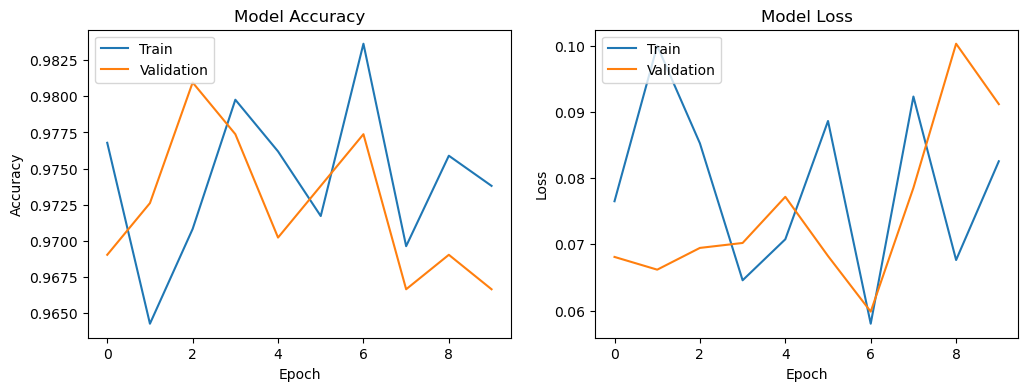

In [11]:
 import matplotlib.pyplot as plt

# Access the training history
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [10]:

model.save('G:\Data\TB\TB_Chest_Radiography_Database\model.h5')

NameError: name 'Sequential' is not defined

In [13]:
from tensorflow.keras.models import load_model

# Load a saved model
loaded_model = load_model('my_model.h5')


In [14]:
# Make predictions on a batch of data
predictions = model.predict(test_dataset)


27/27 [==============================] - 21s 412ms/step


In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Convert the test dataset to NumPy arrays for evaluation
y_true = []
y_pred = []

for images, labels in test_dataset:
    y_true.extend(labels.numpy())
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))

# Compute a classification report
target_names = class_names  # List of class names
report = classification_report(y_true, y_pred, target_names=target_names)
print(report)

# Compute a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print(conf_matrix)


1/1 [==============================] - 1s 734ms/step
              precision    recall  f1-score   support

      Normal       0.97      0.98      0.98       705
Tuberculosis       0.91      0.87      0.89       135

    accuracy                           0.96       840
   macro avg       0.94      0.92      0.93       840
weighted avg       0.96      0.96      0.96       840

[[693  12]
 [ 18 117]]


In [2]:
import PySimpleGUI as sg
import cv2 # You can use other libraries to load and preprocess images
import tensorflow as tf # You can use other libraries to load and use your model

In [3]:
from tensorflow.keras.models import load_model

# Load a saved model
loaded_model = load_model('my_model.h5')


In [4]:
layout = [
    [sg.Text('Select an image:'), sg.InputText(key='-FILE-'), sg.FileBrowse()],
    [sg.Button('Run'), sg.Button('Exit')],
]


In [5]:
# Create the window
window = sg.Window('TB Prediction', layout)

In [6]:
while True:
    event, values = window.read()

    if event in (None, 'Exit'):
        break

    if event == 'Run':
        file_name = values['-FILE-']
        if file_name != '':
            image = cv2.imread(file_name)
            image = cv2.resize(image, (224, 224))
            image = image / 255.0
            image = image.reshape(1, 224, 224, 3)
            prediction = model.predict(image)

            if prediction[0][0] > 0.5:
                result = 'Person has TB'
            else:
                result = 'Person is normal'
            sg.popup('Output:', result)

window.close()

NameError: name 'model' is not defined

In [ ]:
# Close the window
window.close()